# THE SPARKS FOUNDATION.

## Data Science & Business Analytics Intern [GRIP FEB'21].

## Name:- Raj Panchal 

* LinkedIn : https://www.linkedin.com/in/raj-panchal8396/

* GitHub profile : https://github.com/Raj6383

### Task-1 >> Prediction Using Supervised ML.

#### So, for this task, we will be applying Linear Regression for predicting student's percentage based on the number of study hours

#### Problem Statement :- What will be predicted score if a student studies for 9.25 hrs/ day?

#### Source of Data :>> http://bit.ly/w-data

## Exploring and Understanding Data (EDA)









# 1.Load required Libraries

In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Plotting Parameters
plt.rcParams['figure.figsize'] = [8,5]

# 2. Collect and load data

In [2]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

# 3. Explore numeric variables - five number summary

In [4]:
data.describe().tail(5)

,Hours,Scores
min,1.1,17.0
25%,2.7,30.0
50%,4.8,47.0
75%,7.4,75.0
max,9.2,95.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# 4. Check the dataset for any missing values and also print out the correlation matrix

In [6]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

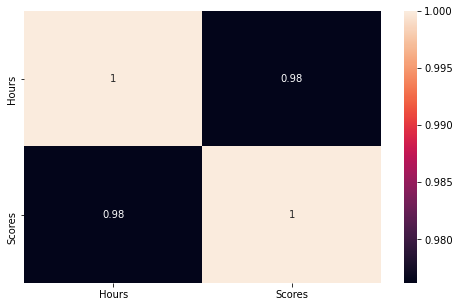

In [8]:
sns.heatmap(data.corr(),annot=True)

##### The high correlation between u and x indicates that the variable u is a good predictor of variable x

# 5. Explore relationships between variables using scatterplots

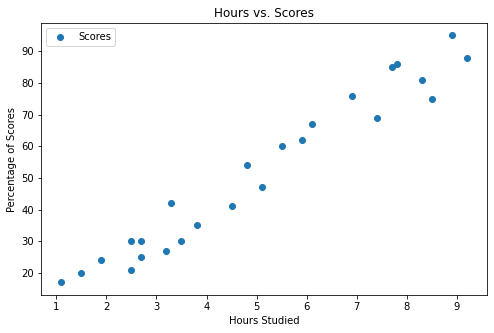

In [9]:
# plotting distribution of Hours vs. Scores
data.plot(x= 'Hours', y='Scores', style = 'o')
plt.title('Hours vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage of Scores')
plt.show()

##### Inference : We can clearly observe a stong linear relationship between the both of two variables and can imagine a straight line, making them ideal for Linear Regression application.

# 6.Data Preparation

In [10]:
#In this stage dividing dataset into features and labels
x1 = data.iloc[:,0].values
y1 = data.iloc[:,1].values

In [11]:
#And reshaping the data, so it will fit into model.
x = x1.reshape(-1,1)
y = y1.reshape(-1,1)


# 7.Split data into train, test sets
* Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.
* Check: train_test_split function

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("X-Train :",x_train.shape)
print("X-Test :",x_test.shape)
print("Y-Train :",y_test.shape)
print("Y-Test :",y_test.shape)

X-Train : (20, 1)
X-Test : (5, 1)
Y-Train : (5, 1)
Y-Test : (5, 1)


# 8.Train the model

In [13]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

## Training set result by plotting regression line.

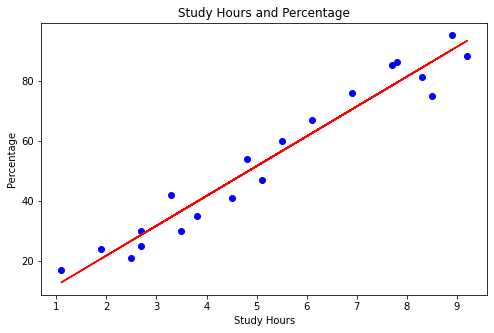

In [14]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, LR.predict(x_train), color = 'red')
plt.title('Study Hours and Percentage')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

In [15]:
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2111.
Date:                Wed, 03 Feb 2021   Prob (F-statistic):                    6.12e-21
Time:                        14:38:07   Log-Likelihood:                         -62.925
No. Observations:                  20   AIC:                                      127.8
Df Residuals:                      19   BIC:                                      128.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.2251      0.223     45.950      0.000       9.759      10.691
==============================================================================
Omnibus:                        2.581   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                1.529
Skew:                          -0.410   Prob(JB):                        0.466
Kurtosis:                       1.922   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Predicting scores for model
prediction = LR.predict(x_test)
prediction

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

# 9.Model Evaluation

As we are dealing with the numerical data, Mean absolute error would be a great choice metric for evaluating Linear Regression model

In [17]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error: >> ',mean_absolute_error(y_test, prediction))

Mean Absolute Error: >>  4.183859899002975


## Solution

In [18]:
hours = np.array(9.25)
hours = hours.reshape(-1, 1)
prediction_for_score = LR.predict(hours)
print('If the student studies for 9.25 hours, he is expected to score',prediction_for_score,'marks.')

If the student studies for 9.25 hours, he is expected to score [[93.69173249]] marks.


## Conclusion

* **After successful model building and the predictions on test data, we can conclude that."If a student studies for 9.25 hours/day, he is expected to score 93.69 marks respectively**